**Importing libraries**

In [ ]:
import tensorflow as tf
import os
import cv2

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

**Loading data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/mouth.zip > /dev/null

In [ ]:
data = '/content/mouth'

In [ ]:
parse = tf.keras.utils.image_dataset_from_directory(data)

Found 5119 files belonging to 2 classes.


In [ ]:
parse

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**Scale data**

In [ ]:
parse = parse.map(lambda x,y: (x/255, y))

parsed_iterator = parse.as_numpy_iterator()

batch = parsed_iterator.next()

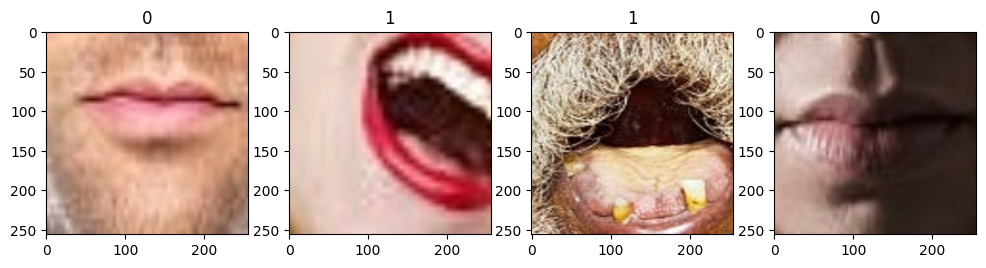

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(12,12))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(batch[1][index])

**Split data**

In [ ]:
len(parse)

160

In [ ]:
train_size = int(len(parse)*0.7)
val_size = int(len(parse)*0.2)
test_size = int(len(parse)*0.1)

In [ ]:
train_size+val_size+test_size

160

In [ ]:
train_size, val_size, test_size

(112, 32, 16)

In [ ]:
train = parse.take(train_size)
val = parse.skip(train_size).take(val_size)
test = parse.skip(train_size+val_size).take(test_size)

In [ ]:
train, val, test

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

**Train**

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/20
112/112 [==============================] - 21s 131ms/step - loss: 0.4781 - accuracy: 0.8016 - val_loss: 0.2501 - val_accuracy: 0.9033
Epoch 2/20
112/112 [==============================] - 11s 98ms/step - loss: 0.2367 - accuracy: 0.9046 - val_loss: 0.2135 - val_accuracy: 0.9170
Epoch 3/20
112/112 [==============================] - 15s 131ms/step - loss: 0.1674 - accuracy: 0.9381 - val_loss: 0.1793 - val_accuracy: 0.9355
Epoch 4/20
112/112 [==============================] - 15s 129ms/step - loss: 0.1715 - accuracy: 0.9369 - val_loss: 0.1629 - val_accuracy: 0.9346
Epoch 5/20
112/112 [==============================] - 11s 94ms/step - loss: 0.1404 - accuracy: 0.9478 - val_loss: 0.1576 - val_accuracy: 0.9414
Epoch 6/20
112/112 [==============================] - 10s 88ms/step - loss: 0.1168 - accuracy: 0.9581 - val_loss: 0.1576 - val_accuracy: 0.9512
Epoch 7/20
112/112 [==============================] - 10s 91ms/step - loss: 0.1162 - accuracy: 0.9612 - val_loss: 0.1354 - val_accura

**Model Performance**

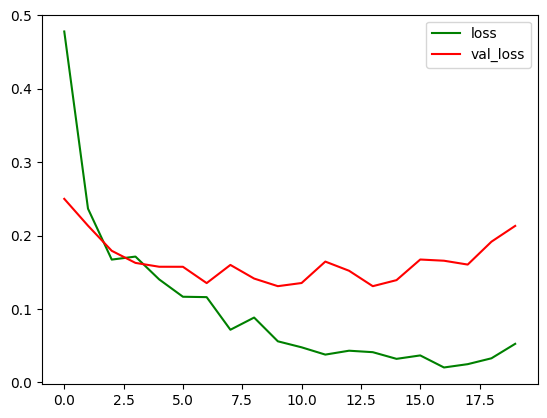

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='green', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend()
plt.show()

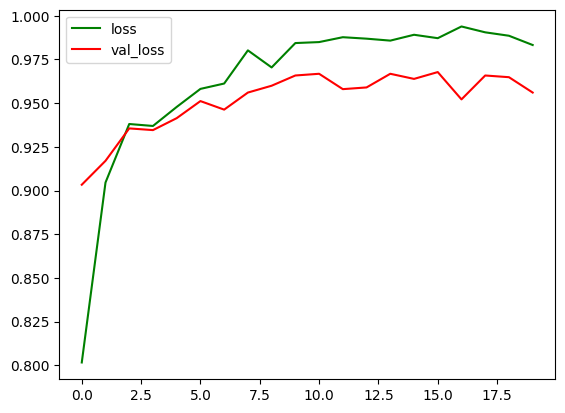

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='green', label='loss')
plt.plot(history.history['val_accuracy'], color='red', label='val_loss')
plt.legend()
plt.show()

**Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 513ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.96153843, shape=(), dtype=float32) tf.Tensor(0.9414226, shape=(), dtype=float32) tf.Tensor(0.9549902, shape=(), dtype=float32)


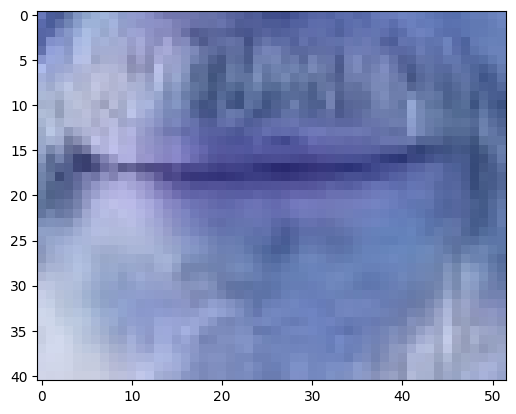

In [ ]:
img = cv2.imread('/content/mouth/close/2888.jpg')
plt.imshow(img)
plt.show()

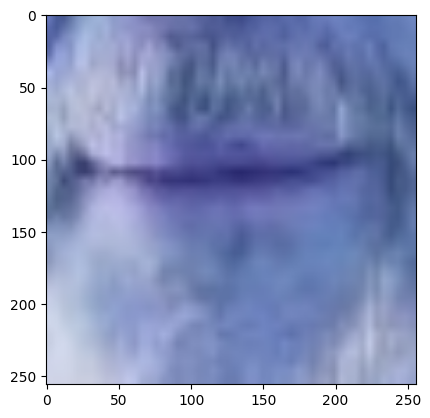

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 200ms/step


In [ ]:
yhat

array([[0.02103967]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Mouth is open')
else:
    print(f'Mouth is closed')

Mouth is closed


**Saving model**

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as file:
    file.write(model_json)

In [ ]:
model.save_weights('model_weights.h5')